7-3


In [25]:
import numpy as np

def inverse_2x2_matrix(matrix):
    a, b = matrix[0]
    c, d = matrix[1]

    det_A = a * d - b * c

    if det_A == 0:

        return (1 / det_A) * np.array([[d, -b], [-c, a]])

7-4

In [4]:
A = np.random.randint(-10,11,size=(4,40))
AAt = A@A.T
AAt_inv = np.linalg.inv(AAt)
R = A.T @ AAt_inv

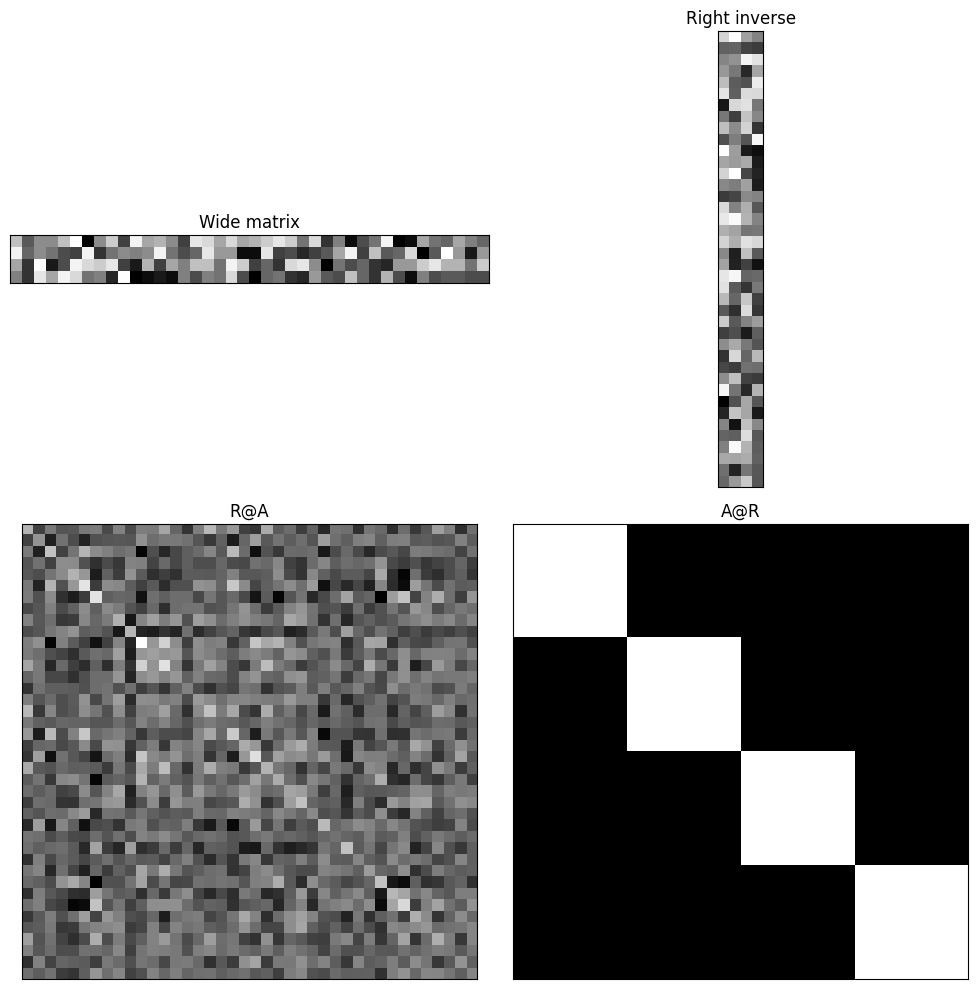

In [7]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(A,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@A,cmap='gray')
axs[1,0].set_title('R@A')

axs[1,1].imshow(A@R,cmap='gray')
axs[1,1].set_title('A@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.show()

7-5

In [10]:
import numpy as np

A = np.random.randn(4,4)
A_pinv = np.linalg.pinv(A)
A_inv = np.linalg.inv(A)

np.linalg.norm(A_pinv - A_inv)

7.840404393322296e-16

In [11]:
A = np.random.randn(10,4)
A_pinv2 = np.linalg.pinv(A)
A_left = np.linalg.inv(A.T@A) @ A.T
np.linalg.norm(A_pinv2 - A_left)

2.6856298407878547e-16

In [12]:
A = np.random.randn(4,10)
A_right = A.T @ np.linalg.inv(A@A.T)
A_pinv3  = np.linalg.pinv(A)
np.linalg.norm(A_pinv3 - A_right)

3.8805024062605676e-15

7-9

In [13]:
H = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        H[i,j] = 1/(i+j+1)

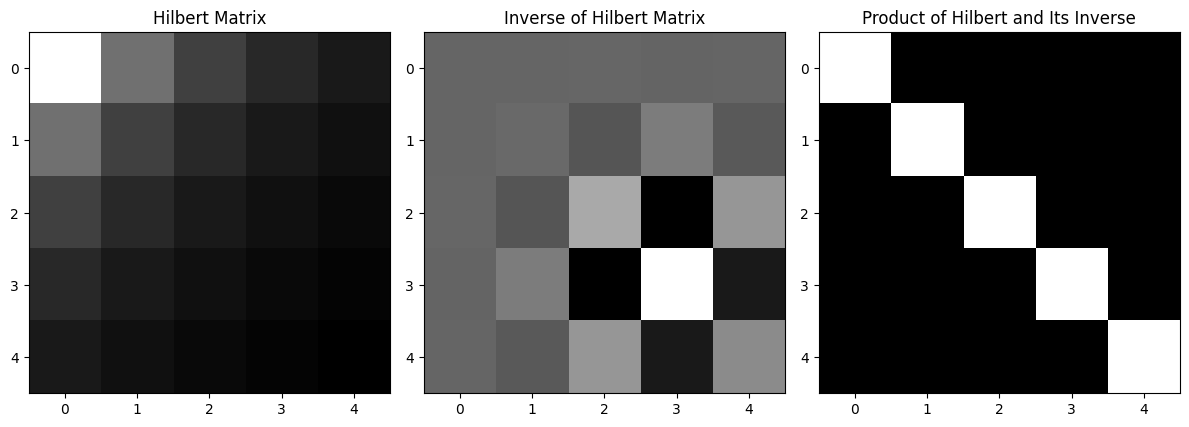

In [16]:
H_inv = np.linalg.inv(H)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
h = [0, 0, 0]

h[0] = axs[0].imshow(H, cmap='gray')
axs[0].set_title('Hilbert Matrix')

h[1] = axs[1].imshow(H_inv, cmap='gray')
axs[1].set_title('Inverse of Hilbert Matrix')

h[2] = axs[2].imshow(H @ H_inv, cmap='gray')
axs[2].set_title('Product of Hilbert and Its Inverse')

plt.tight_layout()
plt.show()

7-10

In [18]:
import numpy as np
from scipy.linalg import hilbert

matSizes = np.arange(3, 13)
identityErrors = np.zeros(len(matSizes))

for i, k in enumerate(matSizes):
    H = hilbert(k)
    H_inv = np.linalg.inv(H)
    H_product = H @ H_inv

    identity_error = np.linalg.norm(H_product - np.eye(k))
    identityErrors[i] = identity_error

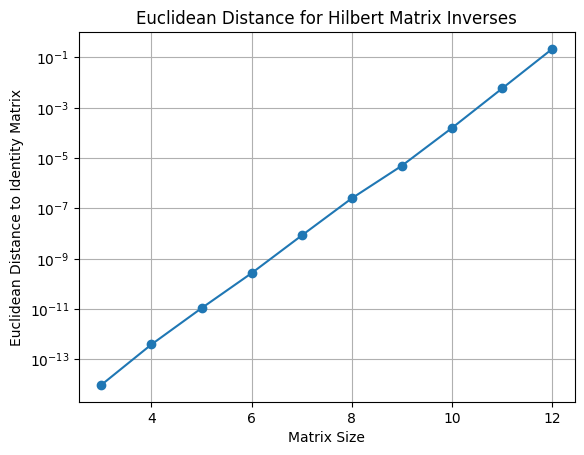

In [20]:
plt.plot(matSizes, identityErrors, marker='o', linestyle='-')
plt.xlabel('Matrix Size')
plt.ylabel('Euclidean Distance to Identity Matrix')
plt.title('Euclidean Distance for Hilbert Matrix Inverses')
plt.yscale('log')
plt.grid(True)
plt.show()